In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
wine_df = pd.read_csv('/content/WineQuality.csv')
wine_df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [ ]:
wine_df.shape

(32485, 14)

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory usage: 3.5+ MB


In [ ]:
wine_df.isnull().sum()


,0
Unnamed: 0,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [ ]:
wine_df.describe()


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,3251.548376,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698
std,1873.780954,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1627.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,4875.000000,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
wine_df['quality'].value_counts()


,count
quality,
6,14117
5,10755
7,5371
4,1144
8,941
3,133
9,24


<Axes: ylabel='count'>

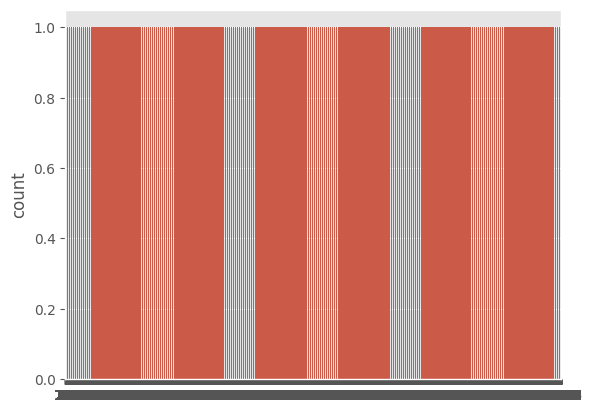

In [ ]:
style.use('ggplot')
sns.countplot(wine_df['quality'])

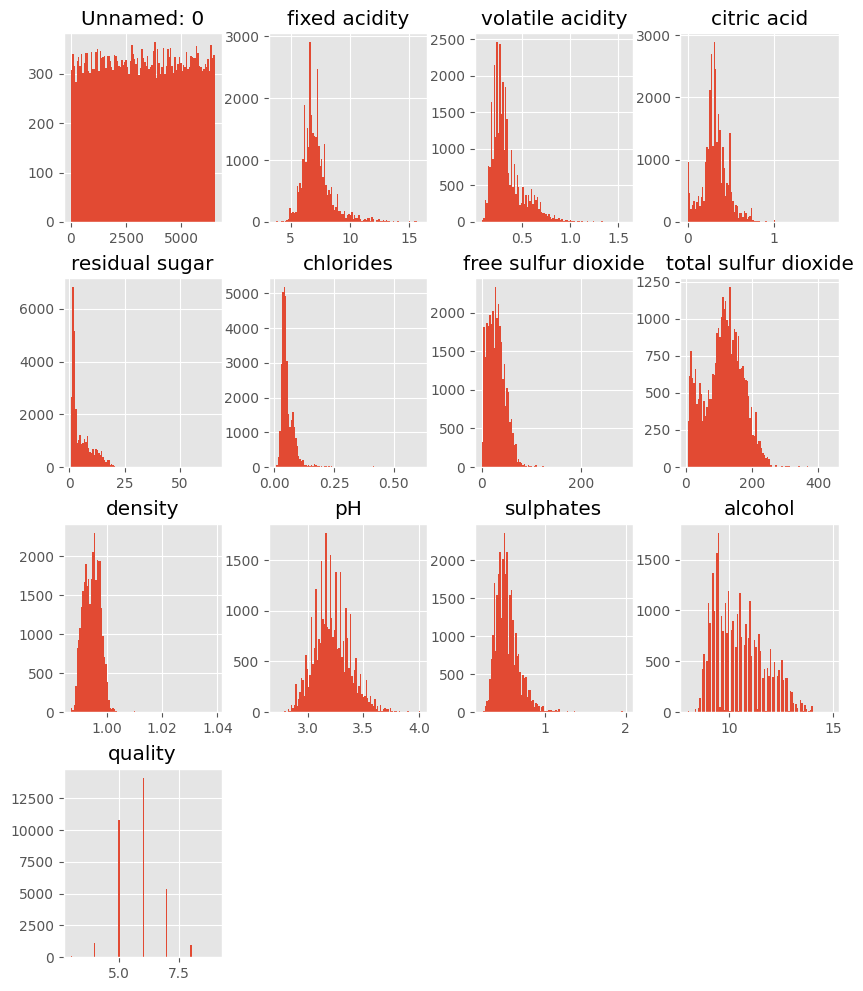

In [ ]:
wine_df.hist(bins=100, figsize=(10,12))
plt.show()

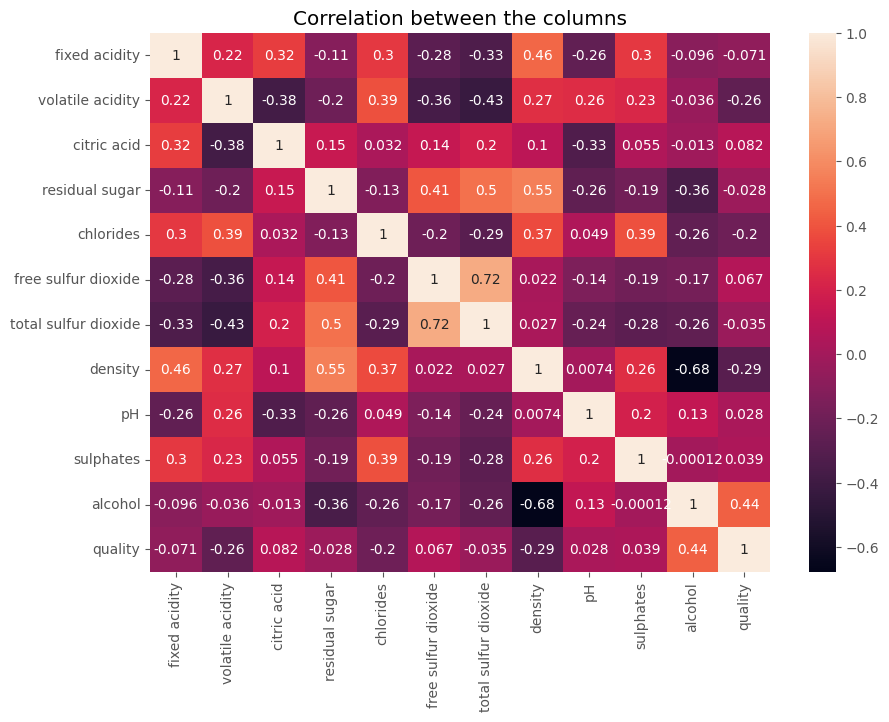

In [ ]:
# Assuming 'White Wine' is a value in a column that should not be included in the correlation
# Select only numerical features for correlation calculation

# Assuming 'Unnamed: 0' is not a relevant feature for correlation
numerical_features = wine_df.select_dtypes(include=np.number).drop(columns=['Unnamed: 0'], errors='ignore')

plt.figure(figsize=(10, 7))
sns.heatmap(numerical_features.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [ ]:
print(wine_df.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Type                     object
dtype: object


In [ ]:
wine_df_numeric = wine_df.select_dtypes(include=['number'])
print(wine_df_numeric.corr()['quality'].sort_values())


density                -0.292981
volatile acidity       -0.264435
chlorides              -0.201491
fixed acidity          -0.071026
total sulfur dioxide   -0.034580
residual sugar         -0.028114
pH                      0.027867
sulphates               0.038585
free sulfur dioxide     0.066980
citric acid             0.081732
alcohol                 0.438075
quality                 1.000000
Name: quality, dtype: float64


In [ ]:
wine_df_encoded = pd.get_dummies(wine_df, drop_first=True)
print(wine_df_encoded.corr()['quality'].sort_values())


density                -0.292981
volatile acidity       -0.264435
chlorides              -0.201491
fixed acidity          -0.071026
total sulfur dioxide   -0.034580
residual sugar         -0.028114
pH                      0.027867
sulphates               0.038585
free sulfur dioxide     0.066980
citric acid             0.081732
Type_White Wine         0.118553
alcohol                 0.438075
quality                 1.000000
Name: quality, dtype: float64


<Axes: xlabel='quality', ylabel='alcohol'>

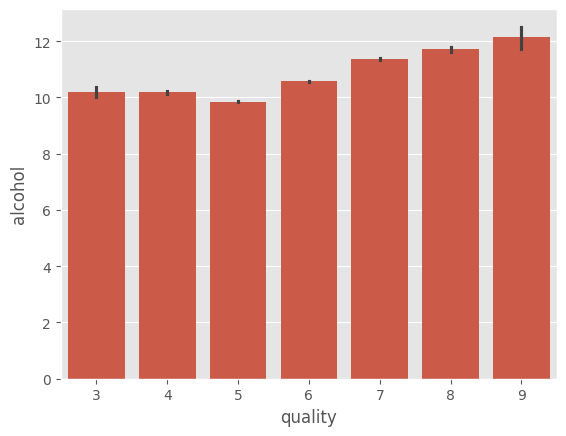

In [ ]:
sns.barplot(x='quality', y='alcohol', data=wine_df)

In [ ]:
wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)

In [ ]:
wine_df['quality'].value_counts()

,count
quality,
0,26149
1,6336


In [ ]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (22739, 12)
y_train  (22739,)
X_test  (9746, 12)
y_test  (9746,)


In [51]:
print(X_train.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
Type                     object
dtype: object


In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [54]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [55]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy is: {:.2f}%".format(logreg_acc * 100))


Test accuracy is: 81.13%


In [57]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5228
           1       0.54      0.21      0.31      1269

    accuracy                           0.81      6497
   macro avg       0.69      0.59      0.60      6497
weighted avg       0.78      0.81      0.78      6497



TN:  4999
FN:  997
TP:  272
FP:  229


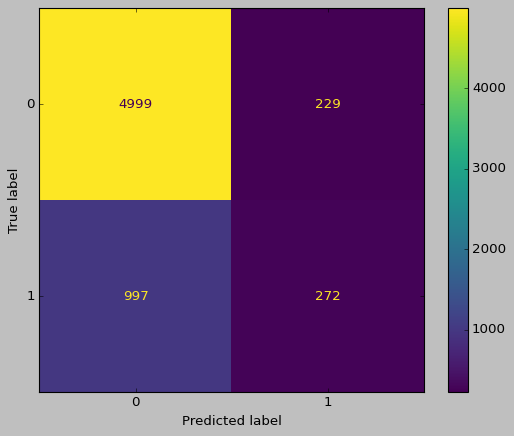

In [58]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [59]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 99.68%


In [60]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       0.99      1.00      0.99      1269

    accuracy                           1.00      6497
   macro avg       0.99      1.00      0.99      6497
weighted avg       1.00      1.00      1.00      6497



TN:  5209
FN:  2
TP:  1267
FP:  19


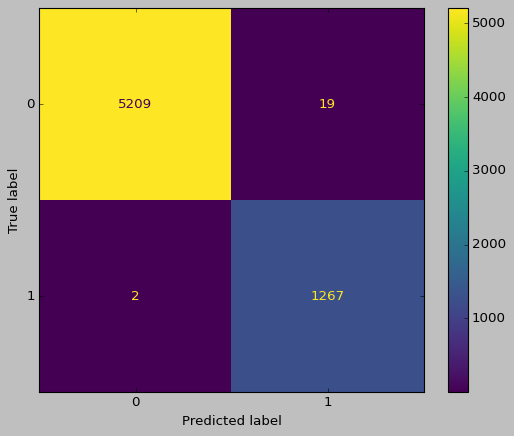

In [61]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [62]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 99.88%


In [63]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       1.00      1.00      1.00      1269

    accuracy                           1.00      6497
   macro avg       1.00      1.00      1.00      6497
weighted avg       1.00      1.00      1.00      6497



TN:  5225
FN:  5
TP:  1264
FP:  3


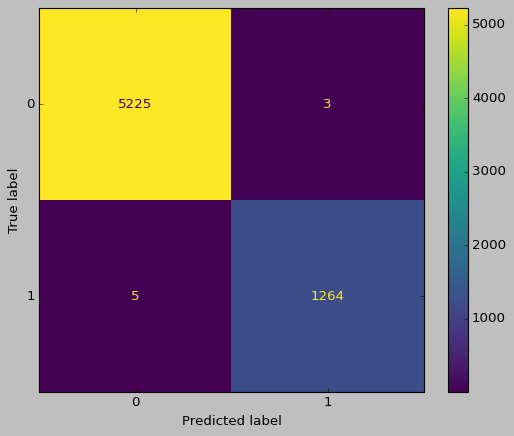

In [64]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])